In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and Prepare Data
1. Load the training and testing datasets from the cleaned data directory.
2. Separate features (`X`) and target labels (`y`) for training and testing.

In [2]:
#load data
train_df=pd.read_csv('../cleaned_data/train_data.csv')
test_df=pd.read_csv('../cleaned_data/test_data.csv')

In [3]:
#separate data and label
y_train=train_df['Default']
X_train=train_df.drop(columns=['Default'])
y_test=test_df['Default']
X_test=test_df.drop(columns=['Default'])

# Train Logistic Regression Model
1. Initialize a logistic regression model.
2. Train the model using the training dataset.

# Evaluate Model Performance
1. Predict the outcomes for the test dataset.
2. Calculate and display the accuracy of the predictions.

In [4]:
model=LogisticRegression(random_state=42)

#fit the model
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8830526728020365

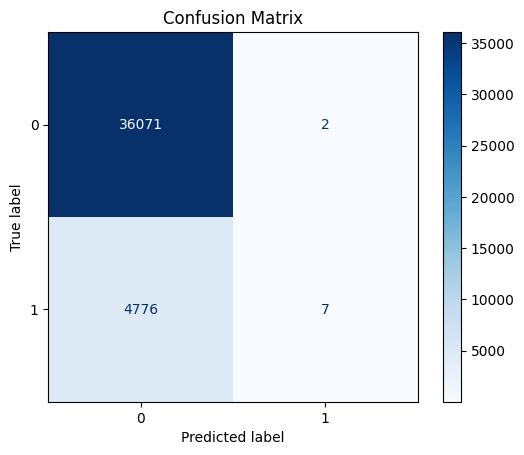

In [5]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Load Final Test Data
1. Load the final test dataset.
2. Extract and remove the `LoanID` column to prepare the data for prediction.

In [6]:
#load final test data 
final_test=pd.read_csv('../data/test.csv')
loan_id_lists=final_test['LoanID']
final_test.drop(columns=['LoanID'],inplace=True)
#one hot encode the test data
final_test=pd.get_dummies(final_test,columns=final_test.select_dtypes(include=['object','category']).columns,dtype=int)

final_pred=model.predict(final_test)
#write the prediction 
with open('LR_predictions.csv','w') as f:
    f.write("LoanID,Default\n")
    for i in range(final_test.shape[0]):
        f.write(f'{loan_id_lists[i]},{final_pred[i]}\n')